In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

In [74]:
df = pd.read_csv("../data/clean_loan_data.csv")

In [75]:
df.isna().sum()

Unnamed: 0           0
id                   0
year                 0
gender               0
loan_type            0
approv_in_adv        0
loan_purpose         0
credit_worthiness    0
loan_amount          0
lump_sum_payment     0
status               0
dtype: int64

In [76]:
df = df[df.columns.to_list()[1:]]

In [77]:
df

,id,year,gender,loan_type,approv_in_adv,loan_purpose,credit_worthiness,loan_amount,lump_sum_payment,status
0,24951,2019,M,type2,nopre,p1,l1,286500,not_lpsm,0
1,25047,2019,M,type1,nopre,p4,l1,156500,not_lpsm,1
2,25128,2019,F,type1,nopre,p3,l1,236500,not_lpsm,0
3,25145,2019,F,type1,nopre,p2,l1,486500,not_lpsm,0
4,25291,2019,M,type2,pre,p3,l1,266500,not_lpsm,1
...,...,...,...,...,...,...,...,...,...,...
105469,173111,2019,M,type1,nopre,p3,l1,466500,not_lpsm,0
105470,173144,2019,F,type1,nopre,p1,l1,406500,not_lpsm,1
105471,173261,2019,Couple,type1,nopre,p4,l1,346500,not_lpsm,0
105472,173428,2019,M,type1,nopre,p4,l1,196500,not_lpsm,0


In [78]:
df.drop(columns=["id", "year"], inplace=True)

In [79]:
df.head(5)

,gender,loan_type,approv_in_adv,loan_purpose,credit_worthiness,loan_amount,lump_sum_payment,status
0,M,type2,nopre,p1,l1,286500,not_lpsm,0
1,M,type1,nopre,p4,l1,156500,not_lpsm,1
2,F,type1,nopre,p3,l1,236500,not_lpsm,0
3,F,type1,nopre,p2,l1,486500,not_lpsm,0
4,M,type2,pre,p3,l1,266500,not_lpsm,1


In [80]:
categorial_cols = df.select_dtypes(include=["object"]).columns.to_list()
categorial_cols

['gender',
 'loan_type',
 'approv_in_adv',
 'loan_purpose',
 'credit_worthiness',
 'lump_sum_payment']

In [81]:
numerical_cols = df.select_dtypes(include=["number"]).columns.to_list()
numerical_cols

['loan_amount', 'status']

In [82]:
numerical_cols.remove("status")

In [83]:
pipeline = make_pipeline(
    make_column_transformer(
        (MinMaxScaler(feature_range=(0, 1)), numerical_cols),
        (OneHotEncoder(), categorial_cols), remainder='passthrough'
    ),
    RandomForestClassifier()
)

In [84]:
pipeline

,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('minmaxscaler', ...), ('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [94]:
df['status'].value_counts()

status
0    81268
1    24206
Name: count, dtype: int64

In [110]:
df['status'].value_counts()

status
0    81268
1    24206
Name: count, dtype: int64

In [85]:
X = df.drop(columns=["status"])
y = df["status"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True, stratify=y)

In [113]:
model = pipeline.fit(X_train, y_train)

In [115]:
y_pred =model.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87     16254
           1       0.52      0.11      0.18      4841

    accuracy                           0.77     21095
   macro avg       0.65      0.54      0.52     21095
weighted avg       0.73      0.77      0.71     21095



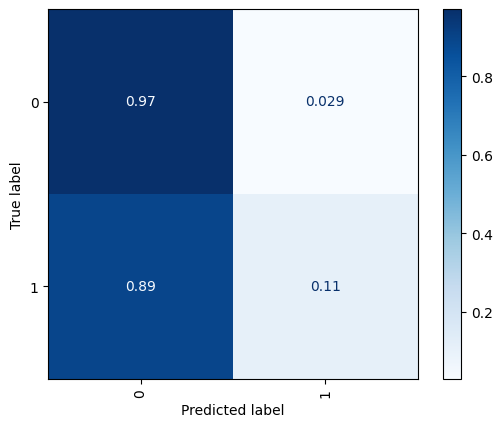

In [117]:
cm = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    cmap=plt.cm.Blues,
    normalize='true',
    display_labels=model.classes_,
    xticks_rotation='vertical'
)